# Final Project 4 : PCA

Kelompok 3 :

1. Andrea Natania (PYTN-KS17-04)
2. Muhammad Al-Abrour (PYTN-KS17-013)
3. Rofyan Luthfi Mafaza (PYTN-KS17-015)
4. Mufidah Nur Amaliah (PYTN-KS17-021)

## A. Perkenalan

Dalam final project kali ini akan dilakukan segmentasi konsumen untuk menentukan strategi marketing yang tepat. Dataset yang digunakan adalah sebanyak 8950 data pengguna aktif kartu kredit pada enam bulan terakhir. Terdapat 18 variabel dalam dataset sebagai berikut:

1. CUST_ID : Identification of Credit Card holder (Categorical)
2. BALANCE : Balance amount left in their account to make purchases 
3. BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES : Amount of purchases made from account
5. ONEOFF_PURCHASES : Maximum purchase amount done in one-go
6. INSTALLMENTS_PURCHASES : Amount of purchase done in installment
7. CASH_ADVANCE : Cash in advance given by the user
8. PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
12. CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
13. PURCHASES_TRX : Numbe of purchase transactions made
14. CREDIT_LIMIT : Limit of Credit Card for user
15. PAYMENTS : Amount of Payment done by user
16. MINIMUM_PAYMENTS : Minimum amount of payments made by user
17. PRCFULLPAYMENT : Percent of full payment paid by user
18. TENURE : Tenure of credit card service for user

## B. Import Packages

In [1]:
!pip install kneed

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

from statsmodels.stats.diagnostic import normal_ad
from scipy.stats import skew

import pickle

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.6f' % x)
%matplotlib inline
sns.set(style='darkgrid')

## C. Data Loading

In [3]:
df = pd.read_csv('CC GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.400000,0.000000,95.400000,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.000000,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.000000,0.000000,0.000000,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.000000,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.170000,773.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.000000,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.000000,1499.000000,0.000000,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.000000,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.000000,16.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.000000,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.120000,0.000000,291.120000,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.000000,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.000000,0.000000,300.000000,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.000000,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.400000,0.000000,144.400000,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.000000,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.000000,0.000000,0.000000,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.000000,52.549959,55.755628,0.250000,6


In [4]:
df.shape

(8950, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Data dari pengguna aktif kartu kredit ada sebanyak 8950 data dan 18 kolom

## D. Data Cleaning
### Check Duplicated Data

In [6]:
df.duplicated().sum()

0

Tidak ada data duplikat dari data di atas

### Drop Unnecessary Column
Kolom Cust_ID dibuang karena tidak diperlukan dalam analisis.

In [7]:
df.drop(['CUST_ID'], axis=1,inplace=True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.400000,0.000000,95.400000,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.000000,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.000000,0.000000,0.000000,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.000000,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.170000,773.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.000000,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.000000,1499.000000,0.000000,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.000000,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.000000,16.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.000000,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.120000,0.000000,291.120000,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.000000,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.000000,0.000000,300.000000,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.000000,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.400000,0.000000,144.400000,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.000000,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.000000,0.000000,0.000000,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.000000,52.549959,55.755628,0.250000,6


### Check Null Values

In [8]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

#### Check distribusi kolom dengan missing values

$H_0$ : Kolom Credit Limit terdistribusi secara normal
$H_1$ : Kolom Credt Limit tidak terdistribusi secara normal

$H_0$ : Kolom Minimum Payment terdistribusi secara normal
$H_1$ : Kolom Minimum Payment tidak terdistribusi secara normal

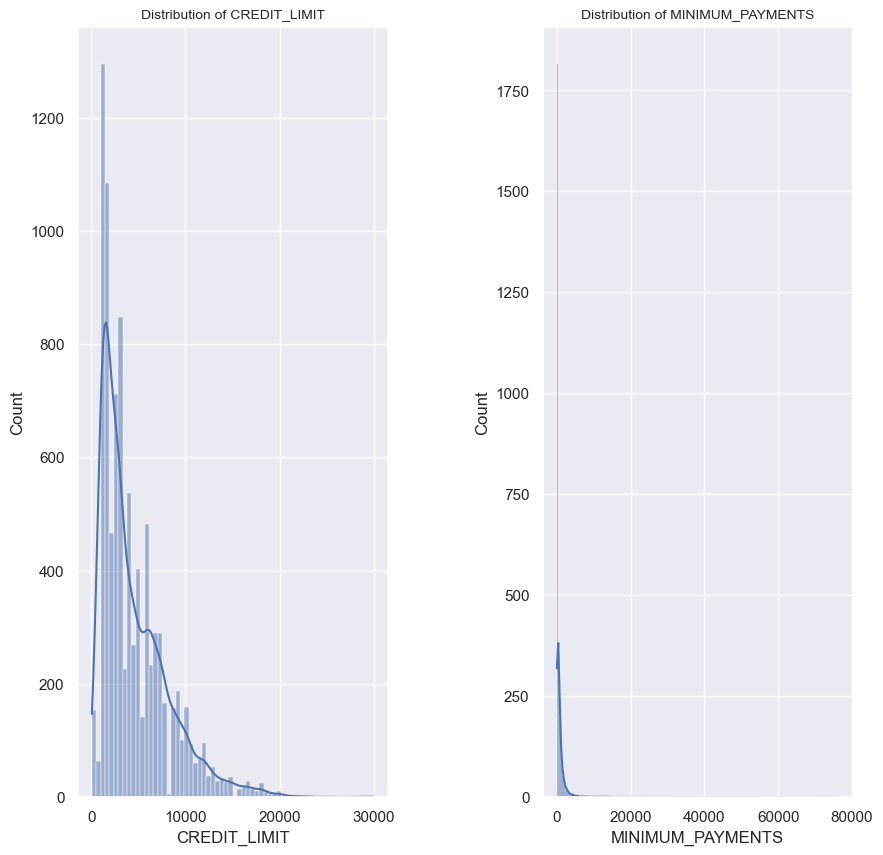

In [9]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.7, wspace=0.5)

dist1  = ['CREDIT_LIMIT','MINIMUM_PAYMENTS']

def stacked_dist(df, columns):
        length = len(columns)
        if length % 2 == 0:
                row = length // 2
        else:
                row = length // 2 + 1
        odd = 1
        even = 2
        for i in range(0, length, 2):
                if i < length - 1:
                        ax1 = fig.add_subplot(row, 2, odd)
                        sns.histplot(df[columns[i]],kde=True)
                        ax1.set_title(f"Distribution of {columns[i]}", fontsize=10)
                        odd += 2
                        
                        ax2 = fig.add_subplot(row, 2, even)
                        sns.histplot(df[columns[i + 1]], kde=True)
                        ax2.set_title(f"Distribution of {columns[i + 1]}", fontsize=10)
                        even += 2
        plt.show()

stacked_dist(df, dist1)

In [10]:
central_tendency = pd.DataFrame({'Kolom':dist1,
                                 'Mean':[df[i].mean()  for i in dist1],
                                'Median':[df[i].median()  for i in dist1],
                                'Modus': [df[i].mode()[0]  for i in dist1],
                                'p-value': [normal_ad(df[i])[1] for i in dist1],
                                'skewness': [skew(df[i]) for i in dist1]})
central_tendency['check'] = central_tendency['p-value']<0.05
central_tendency['skew'] = np.where(central_tendency['Mean']< central_tendency['Median'], 'Left skewed', 'Right skewed')
central_tendency

,Kolom,Mean,Median,Modus,p-value,skewness,check,skew
0,CREDIT_LIMIT,4494.449450,3000.000000,3000.000000,0.000000,NaN,True,Right skewed
1,MINIMUM_PAYMENTS,864.206542,312.343947,299.351881,0.000000,NaN,True,Right skewed


Dari pengecekan di atas, p-value credit limit dan minimum payment lebih kecil dari 0.05. Maka dari itu $H_0$ ditolak, sehingga kolom credit limit dan minimum payments tidak terdistribusi dengan normal. Karena kedua kolom tidak terdistribusi secara normal, missing values pada kedua kolom akan di-impute dengan nilai median. 

In [11]:
for i in dist1:
    df[i].fillna(df[i].median(), inplace=True)
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Missing values dari data di atas sudah di impute dengan median, sehingga data sudah tidak mempunyai missing values.

### Outliers Checking

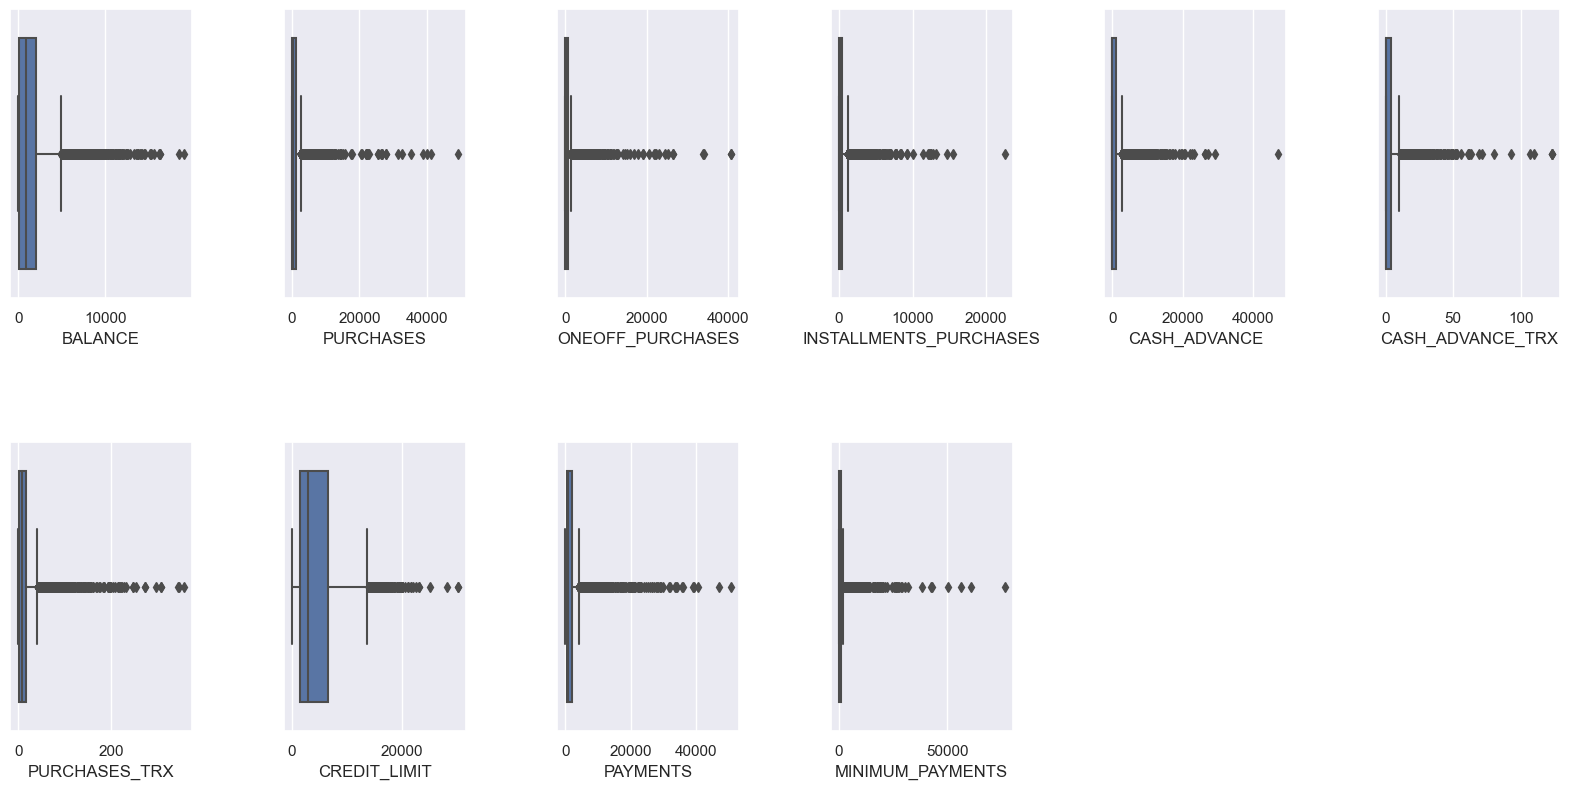

In [12]:
fig = plt.figure(figsize=(20, 15))
fig.subplots_adjust(hspace=.5, wspace=.5)

numerical_col  = ['BALANCE','PURCHASES', 'ONEOFF_PURCHASES', 
        'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX',
        'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 
        'MINIMUM_PAYMENTS', 'TENURE' ]

def stacked_outlier_check(df, columns):
        length = len(columns)
        if length % 2 == 0:
                row = length // 2
        else:
                row = length // 2 + 1
        odd = 1
        even = 2
        for i in range(0, length, 2):
                if i < length - 1:
                        ax1 = fig.add_subplot(3, row, odd)
                        sns.boxplot(x=df[columns[i]])
                        odd += 2
                        
                        ax2 = fig.add_subplot(3, row, even)
                        sns.boxplot(x=df[columns[i+1]])
                        even += 2
        plt.show()

stacked_outlier_check(df, numerical_col)

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
print(Q1)
print(Q3)

BALANCE                             128.281915
BALANCE_FREQUENCY                     0.888889
PURCHASES                            39.635000
ONEOFF_PURCHASES                      0.000000
INSTALLMENTS_PURCHASES                0.000000
CASH_ADVANCE                          0.000000
PURCHASES_FREQUENCY                   0.083333
ONEOFF_PURCHASES_FREQUENCY            0.000000
PURCHASES_INSTALLMENTS_FREQUENCY      0.000000
CASH_ADVANCE_FREQUENCY                0.000000
CASH_ADVANCE_TRX                      0.000000
PURCHASES_TRX                         1.000000
CREDIT_LIMIT                       1600.000000
PAYMENTS                            383.276166
MINIMUM_PAYMENTS                    170.857654
PRC_FULL_PAYMENT                      0.000000
TENURE                               12.000000
Name: 0.25, dtype: float64
BALANCE                            2054.140036
BALANCE_FREQUENCY                     1.000000
PURCHASES                          1110.130000
ONEOFF_PURCHASES                 

In [14]:
IQR = Q3-Q1
print(IQR)

BALANCE                            1925.858120
BALANCE_FREQUENCY                     0.111111
PURCHASES                          1070.495000
ONEOFF_PURCHASES                    577.405000
INSTALLMENTS_PURCHASES              468.637500
CASH_ADVANCE                       1113.821139
PURCHASES_FREQUENCY                   0.833334
ONEOFF_PURCHASES_FREQUENCY            0.300000
PURCHASES_INSTALLMENTS_FREQUENCY      0.750000
CASH_ADVANCE_FREQUENCY                0.222222
CASH_ADVANCE_TRX                      4.000000
PURCHASES_TRX                        16.000000
CREDIT_LIMIT                       4900.000000
PAYMENTS                           1517.858151
MINIMUM_PAYMENTS                    617.855846
PRC_FULL_PAYMENT                      0.142857
TENURE                                0.000000
dtype: float64


In [15]:
len((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR)))

8950

Karena jumlah outlier dari data sebanyak 8950 dari total jumlah row sebesar 8950, maka outlier tidak akan dibuang.

In [16]:
df.describe() 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


1. Kolom BALANCE memiliki mean sebesar 1564.47 dengan nilai terkecil sebesar 0 dan terbesar sebesar 19043.14. 
2. Kolom PURCHASES memiliki nilai terkecil sebesar dan terbesar 49039.57 dengan mean 1003.20. Hal ini menunjukkan bahwa ada pengguna yang tidak melakukan transaksi selama 6 bulan terakhir.
3. Nilai terkecil kolom ONEOFF_PURCHASES adalah sebesar 0 dan nilai terbesarnya adala 40761.25 dengan mean sebesar 592.44. 
4. Mean dari kolom INSTALLMENTS_PURCHASES adalah sebesar 411.07 dengan nilai terkecil 0 dan nilai terbesar 22500. Hal ini menunjukkan bahwa ada pengguna kartu kredit yang tidak melakukan pembayaran secara dicicil
5. Kolom CASH_ADVANCE_FREQUENCY memiliki mean sebesar 0.135 dengan nilai minimum sebesar 0 dan maksimum sebesar 1.5. Hal ini menunjukkan bahwa ada pengguna kartu kredit yang tidak membayar tagihan kartu kredit in advance.
6. Kolom CASHADVANCETRX memiliki mean sebesar 3.25 dengan nilai minimum sebesar 0 dan maksimum sebesar 123. Sama seperti CASH_ADVANCE_FREQUENCY, hal ini menunkukkan bahwa ada pengguna kartu kredit yang tidak membayar tagihan kartu kredit in advance.
7. Nilai minimum PURCHASES_TRX adalah sebesar 0 dengan nilai maksimum sebesar 358 dan mean sebesar 14.71. Hal ini menunjukkan bahwa ada pengguna kartu kredit yang tidak melakukan transaksi selama 6 bulan terakhir. 
8. CREDIT_LIMIT terkecil yang diberikan adalah sebesar 50 dan terbesar sebesar 30000 dengan mean sebesar 4494.28.
9. Pada kolom PAYMENTS, nilai minimumnya adalah sebesar 0 dan nilai maksimum sebesar 50721.48 dengan mean sebesar 1733.14. Hal ini menunjukkan bahwa ada pengguna kartu kredit yang belum melakukan pembayaran atau memang tidak memiliki tagihan selama 6 bulan terakhir.
10. Kolom MINIMUM_PAYMENTS memiliki nilai minimum sebesar 0.019 dan nilai maksimum sebesar 76406.20 dengan mean sebesar 844.91.
11. TENURE terpendek dari kartu kredit adalah selama 6 bulan dan terlama pada 12 bulan. 

## E. EDA

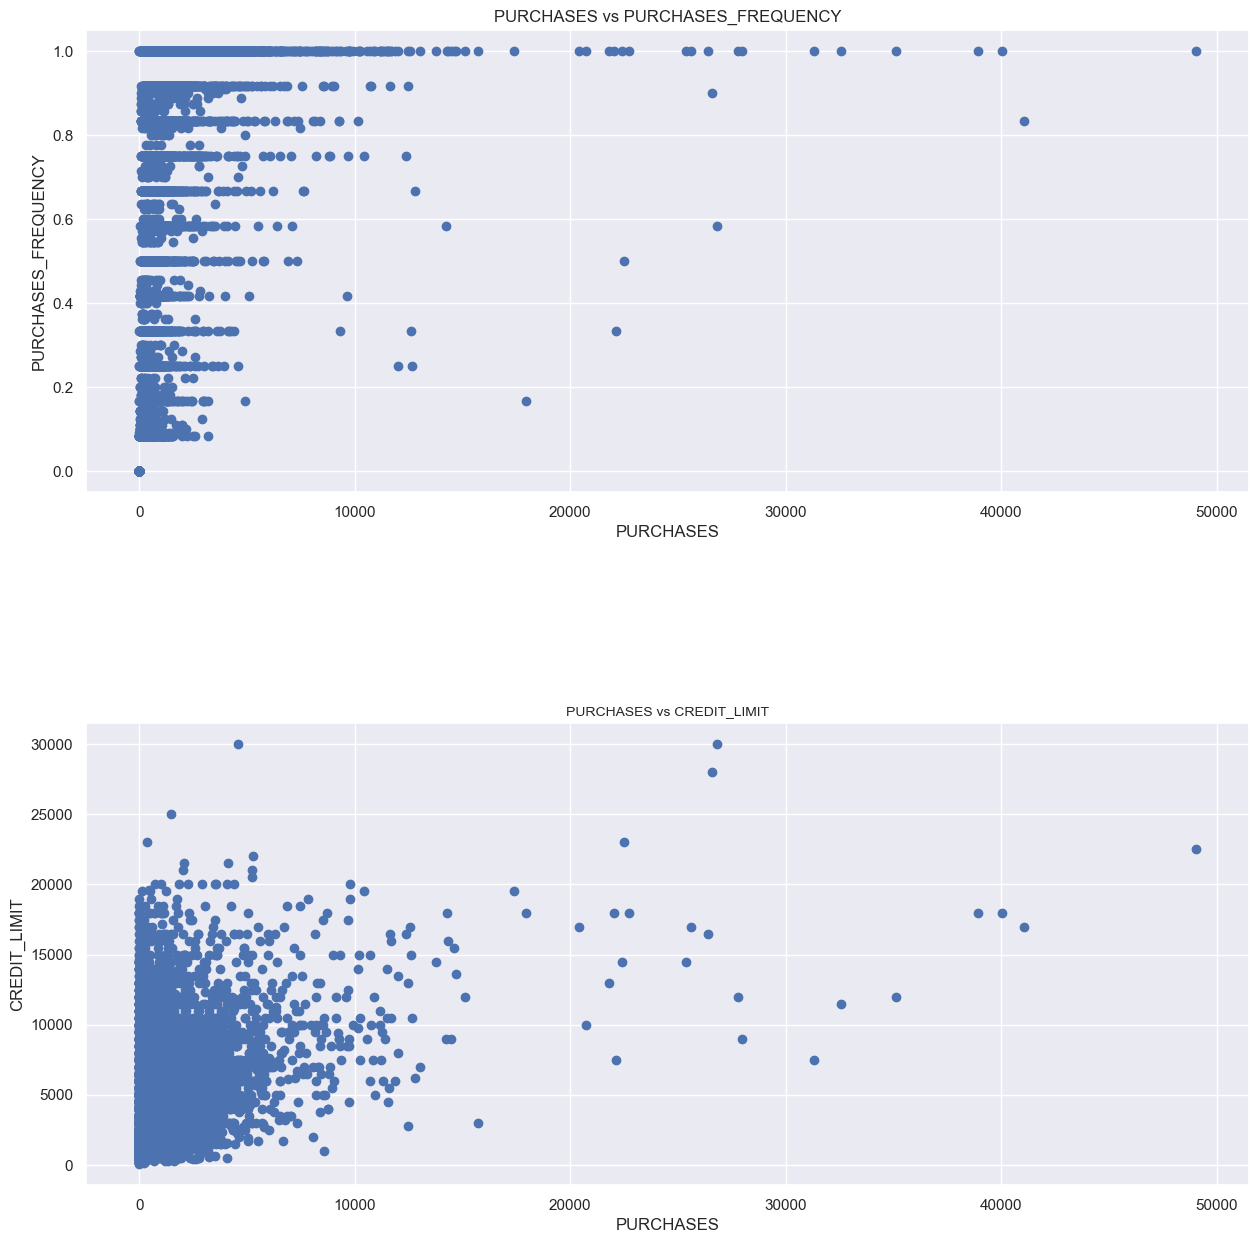

In [17]:
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(hspace=.5, wspace=.5)

ax = fig.add_subplot(2,1,1)
plt.scatter(  df['PURCHASES'],df['PURCHASES_FREQUENCY'])
plt.ylabel('PURCHASES_FREQUENCY')
plt.xlabel('PURCHASES')
ax.set_title("PURCHASES vs PURCHASES_FREQUENCY")

ax = fig.add_subplot(2,1,2)
plt.scatter(df['PURCHASES'], df['CREDIT_LIMIT'])
plt.ylabel('CREDIT_LIMIT')
plt.xlabel('PURCHASES')
ax.set_title("PURCHASES vs CREDIT_LIMIT", fontsize=10)

plt.show()

Dari grafik di atas, dapat dilihat bahwa tidak ada hubungan linear dari banyaknya seringnya melakukan transaksi dan jumlah transaksi yang dilakukan selama  6 bulan terakhir. Maka dapat dikatakan bahwa banyaknya transaksi tidak menentukan banyaknya jumlah transaksi. Selain itu juga tidak ada hubungan linear dengan total transaksi dengan credit limit. 

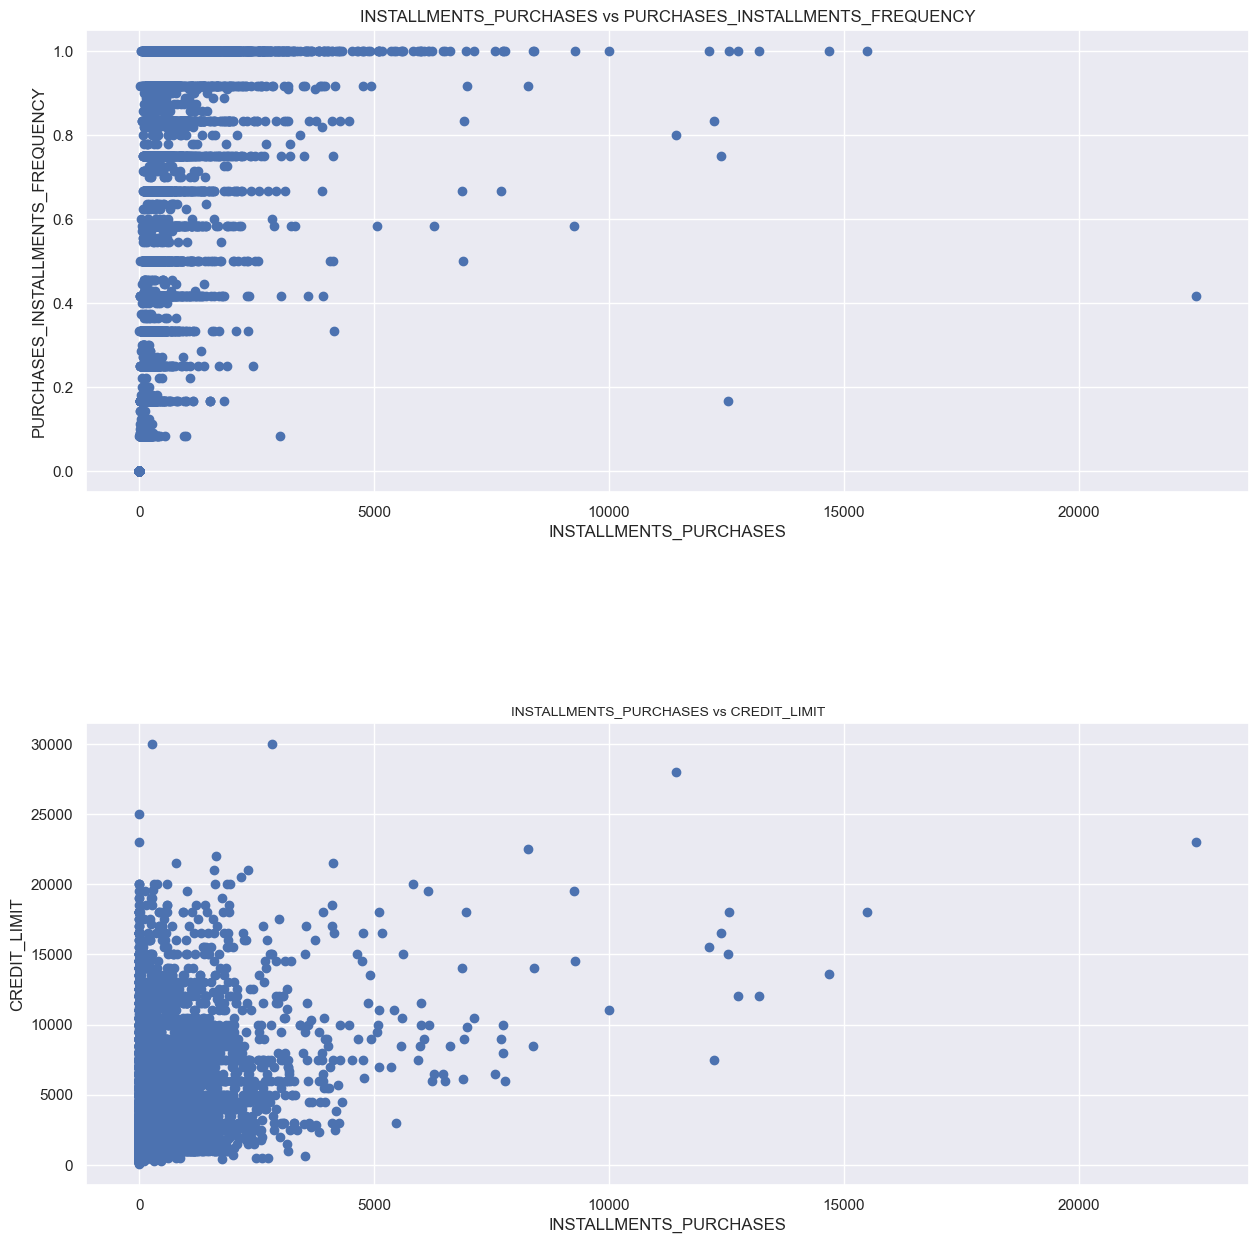

In [18]:
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(hspace=.5, wspace=.5)

ax = fig.add_subplot(2,1,1)
plt.scatter(  df['INSTALLMENTS_PURCHASES'],df['PURCHASES_INSTALLMENTS_FREQUENCY'])
plt.ylabel('PURCHASES_INSTALLMENTS_FREQUENCY')
plt.xlabel('INSTALLMENTS_PURCHASES')
ax.set_title("INSTALLMENTS_PURCHASES vs PURCHASES_INSTALLMENTS_FREQUENCY")

ax = fig.add_subplot(2,1,2)
plt.scatter(df['INSTALLMENTS_PURCHASES'], df['CREDIT_LIMIT'])
plt.ylabel('CREDIT_LIMIT')
plt.xlabel('INSTALLMENTS_PURCHASES')
ax.set_title("INSTALLMENTS_PURCHASES vs CREDIT_LIMIT", fontsize=10)

plt.show()

Dari grafik di atas, dapat dilihat bahwa tidak ada hubungan linear dari banyaknya seringnya melakukan cicilan transaksi dan jumlah cicilan transaksi yang dilakukan selama  6 bulan terakhir. Maka dapat dikatakan bahwa banyaknya cicilan transaksi tidak menentukan banyaknya jumlah dari cicilan transaksi. Selain itu juga tidak ada hubungan linear dengan total cicilan transaksi dengan credit limit. 

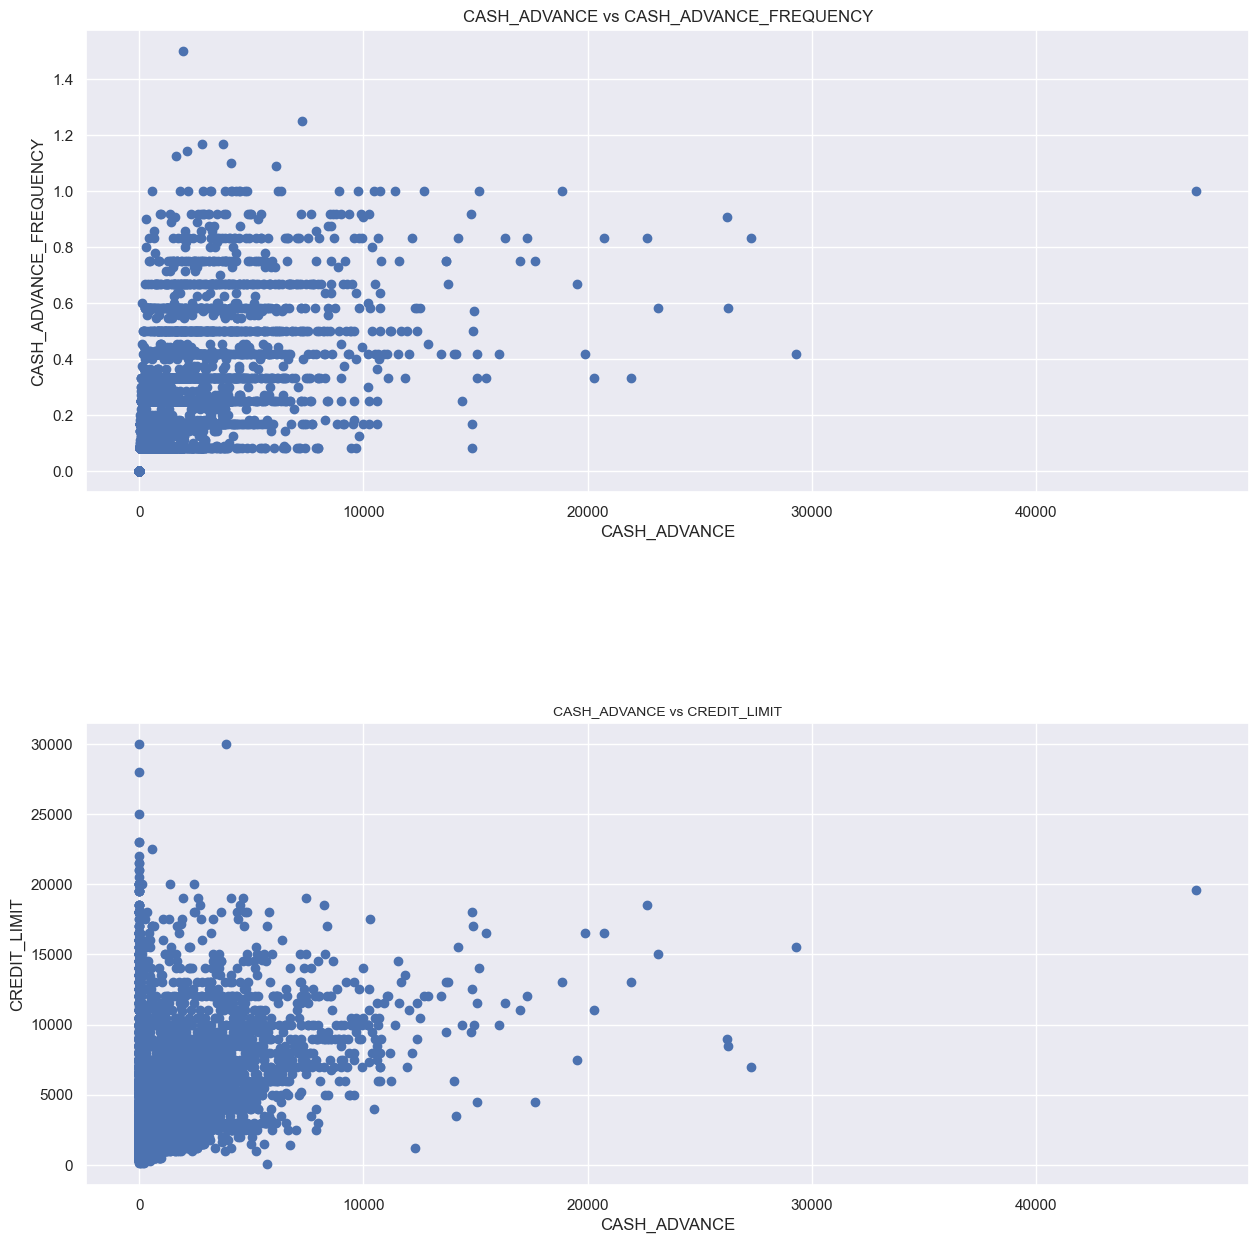

In [19]:
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(hspace=.5, wspace=.5)

ax = fig.add_subplot(2,1,1)
plt.scatter(  df['CASH_ADVANCE'],df['CASH_ADVANCE_FREQUENCY'])
plt.ylabel('CASH_ADVANCE_FREQUENCY')
plt.xlabel('CASH_ADVANCE')
ax.set_title("CASH_ADVANCE vs CASH_ADVANCE_FREQUENCY")

ax = fig.add_subplot(2,1,2)
plt.scatter(df['CASH_ADVANCE'], df['CREDIT_LIMIT'])
plt.ylabel('CREDIT_LIMIT')
plt.xlabel('CASH_ADVANCE')
ax.set_title("CASH_ADVANCE vs CREDIT_LIMIT", fontsize=10)

plt.show()

Dari grafik di atas, dapat dilihat bahwa tidak ada hubungan linear dari banyaknya seringnya menaruh cash advance dan jumlah cash advance yang dilakukan selama  6 bulan terakhir. Selain itu juga tidak ada hubungan linear dengan total cash advance dengan credit limit. 

### Data Correlation

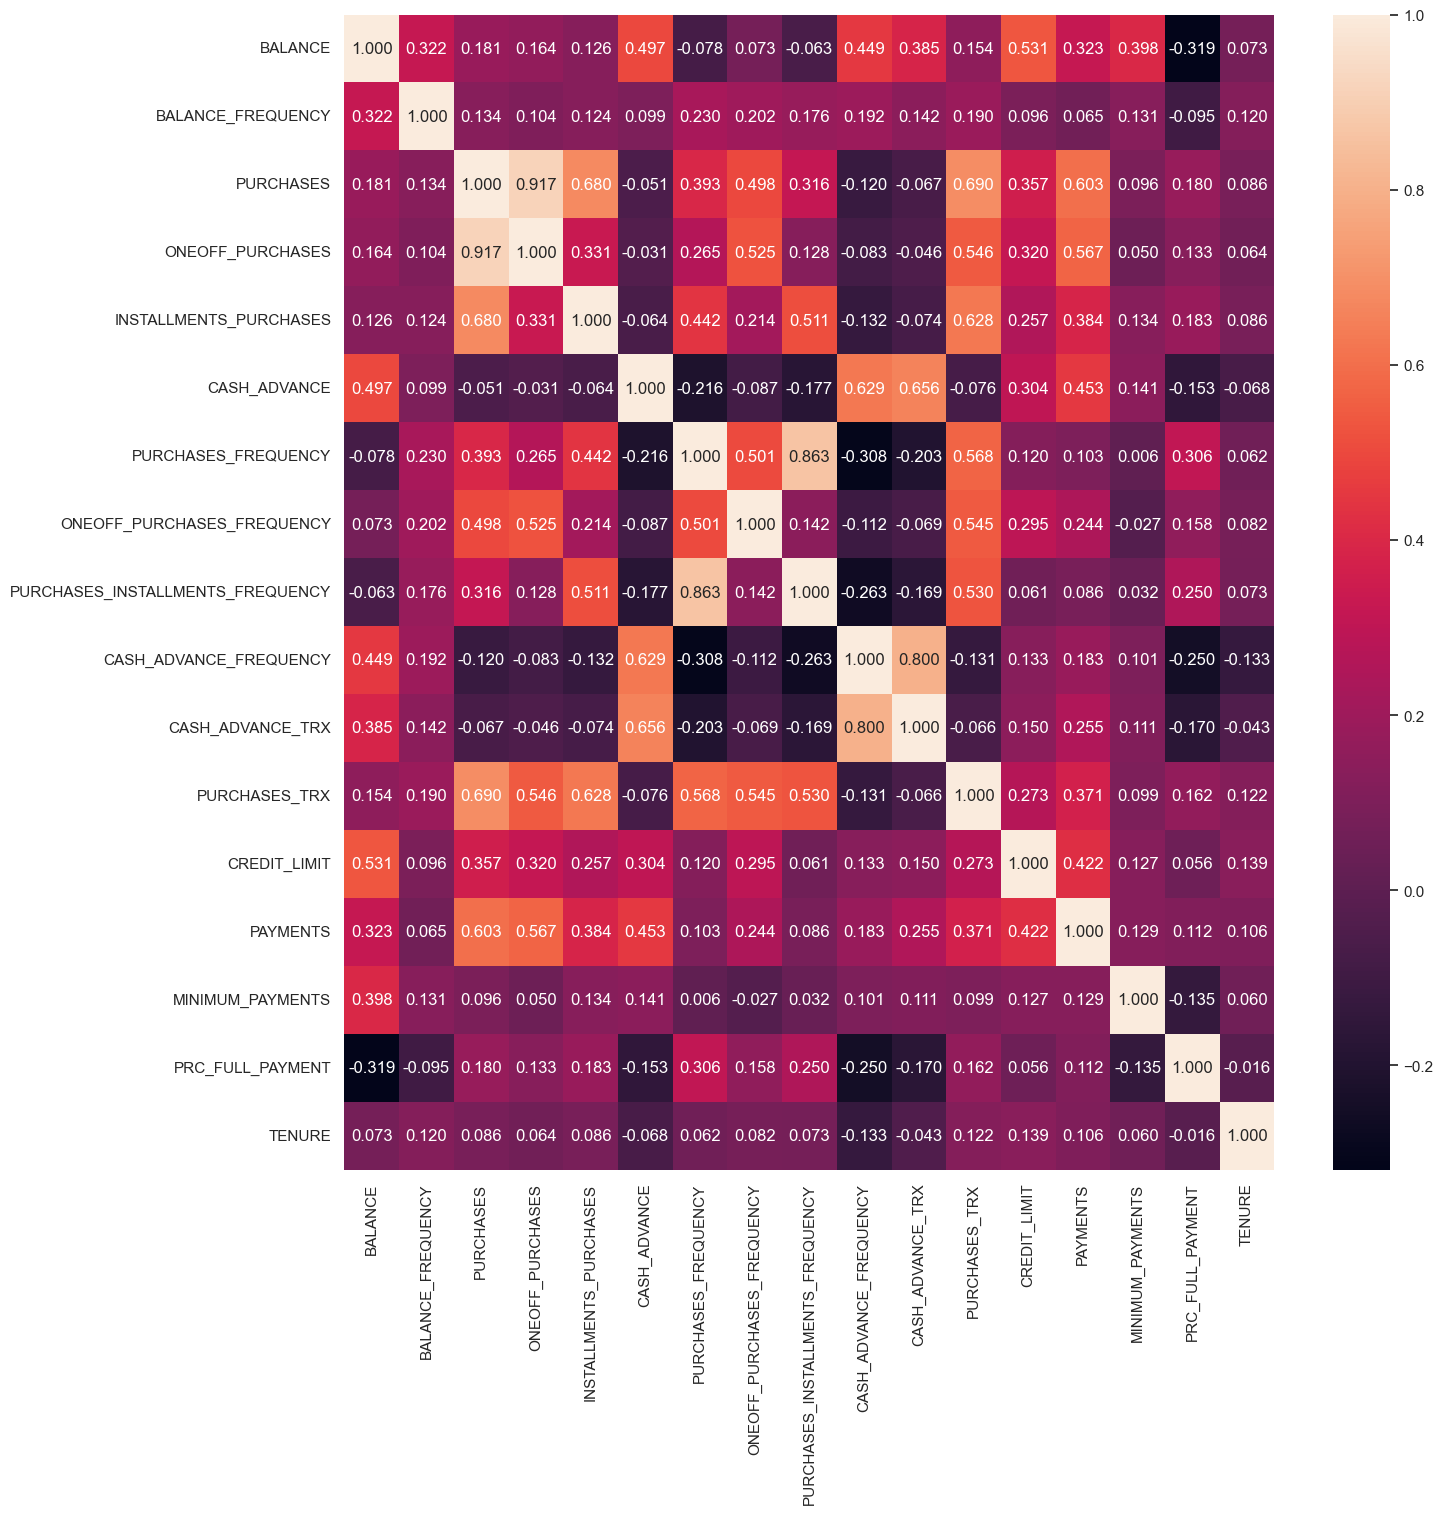

In [20]:
fig = plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, fmt=".3f")
plt.show()

Dari heatmap di atas, didapatkan bahwa korelasi terbesar adalah antara ONEOFF_PURCHASE dan PURCHASE. Korelasi terkuat kedua adalah sebesar 0.863 antara kolom PURCHASES_INSTALLMENT_FREQUENCY dengan PURCHASES_FREQUENCY. Hal ini menandakan bahwa semakin banyak transaksi yang dilakukan, maka semakin banyak juga cicilan yang dilakukan dan juga sebaliknya. 

## F. Data Pre-Processing
### Splitting Data

In [21]:
train, test = train_test_split(df, test_size=0.25, random_state=42)
train_index = train.index
test_index = test.index

### Standardizing Data

In [22]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## G. Pendefinisian dan Pelatihan Model
### 1. K-Means 

C:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

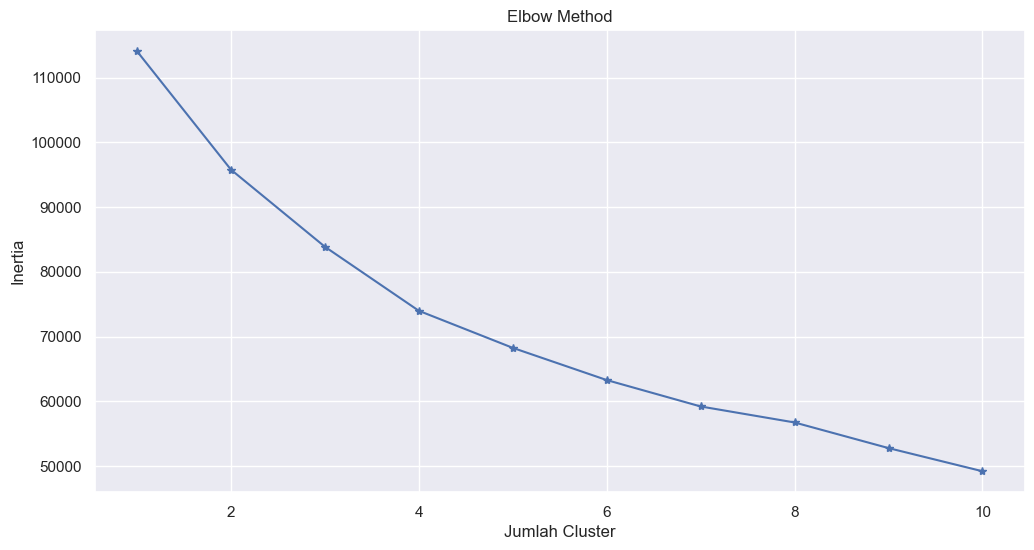

In [23]:
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
    kmeans.fit(train_scaled)

    iner = kmeans.inertia_
    inertias.append(iner)
    
plt.figure(figsize=(12,6));
plt.plot(range(1,11), inertias, marker='*');
plt.xlabel("Jumlah Cluster");
plt.ylabel("Inertia");
plt.title("Elbow Method")
plt.show()

In [24]:
kl = KneeLocator(range(1, 11), inertias, curve = 'convex', direction = 'decreasing')
kl.elbow

4

Dari grafik di atas, didapatkan bahwa elbow terdapat pada cluster 4. Maka modelling akan digunakan menggunakan 4 cluster.

In [25]:
kmean = KMeans(n_clusters=4, init = 'k-means++', random_state=42)
predicted_train = kmean.fit_predict(train_scaled)
print(predicted_train)

[2 1 1 ... 1 1 0]


C:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### a. Model Evaluation

In [26]:
kmean.inertia_

73983.00347105434

In [27]:
score = silhouette_score(train_scaled, kmean.labels_, metric='euclidean')
score

0.20451963908997123

Nilai insersia yang didapatkan dengan model K-Means dengan menggunakan 4 cluster adalah sebesar 79032.06 dan silhouette score sebesar 0.199. 

In [28]:
labels = kmean.labels_
labels

array([2, 1, 1, ..., 1, 1, 0])

In [29]:
clusters = kmean.predict(train_scaled)
train['cluster'] = clusters
train

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
7050,5890.807655,1.000000,901.600000,901.600000,0.000000,4589.501068,0.750000,0.750000,0.000000,0.500000,17,24,10750.000000,1366.889828,1407.884173,0.000000,12,2
4955,1281.842665,1.000000,0.000000,0.000000,0.000000,371.667107,0.000000,0.000000,0.000000,0.333333,4,0,1500.000000,576.243687,407.814510,0.000000,12,1
8586,1243.254633,1.000000,0.000000,0.000000,0.000000,1428.440429,0.000000,0.000000,0.000000,0.083333,1,0,3500.000000,562.362623,276.403192,0.000000,12,1
2144,139.449391,0.727273,843.030000,0.000000,843.030000,0.000000,0.583333,0.000000,0.583333,0.000000,0,7,2200.000000,1312.375596,179.548143,0.000000,12,1
6063,158.038938,1.000000,1780.830000,1697.470000,83.360000,0.000000,1.000000,1.000000,0.166667,0.000000,0,51,4500.000000,1892.999476,168.906777,1.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1079.097023,1.000000,247.440000,0.000000,247.440000,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1200.000000,503.445403,302.481716,0.000000,12,0
5191,833.541256,1.000000,0.000000,0.000000,0.000000,1422.637361,0.000000,0.000000,0.000000,0.333333,8,0,2500.000000,180.104404,282.085369,0.000000,12,1
5390,40.247238,0.181818,0.000000,0.000000,0.000000,909.480894,0.000000,0.000000,0.000000,0.083333,2,0,1500.000000,3578.648701,69.271137,1.000000,12,1
860,0.000000,0.000000,199.880000,0.000000,199.880000,0.000000,0.750000,0.000000,0.750000,0.000000,0,14,4000.000000,0.000000,312.343947,0.000000,12,1


### 2. PCA

In [30]:
pca = PCA(2)
principalComponents = pca.fit_transform(train_scaled)
x, y = principalComponents[:, 0], principalComponents[:, 1]
print(principalComponents.shape)

colors = {0: 'red', 1: 'blue', 2: 'green',3:'yellow'}

(6712, 2)


In [31]:
pca.explained_variance_ratio_

array([0.27468955, 0.20462787])

Dari hasil menggunakan PCA di atas, dapat dilihat bahwa principal component 1 menampung 47.15% informasi dan principal component 2 menampung 17.49% informasi.

In [32]:
colors = {0: 'red', 1: 'blue', 2: 'green',3:'yellow', 4:'purple'}
final_df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = final_df.groupby(labels)

In [33]:
final_df

,x,y,label
0,0.757752,3.722521,2
1,-1.913749,0.488285,1
2,-1.680337,0.108148,1
3,-0.342163,-1.354307,1
4,2.376224,-1.595881,0
...,...,...,...
6707,0.064933,-1.544668,0
6708,-1.959764,0.867177,1
6709,-1.541868,-1.117805,1
6710,-0.745659,-1.946890,1


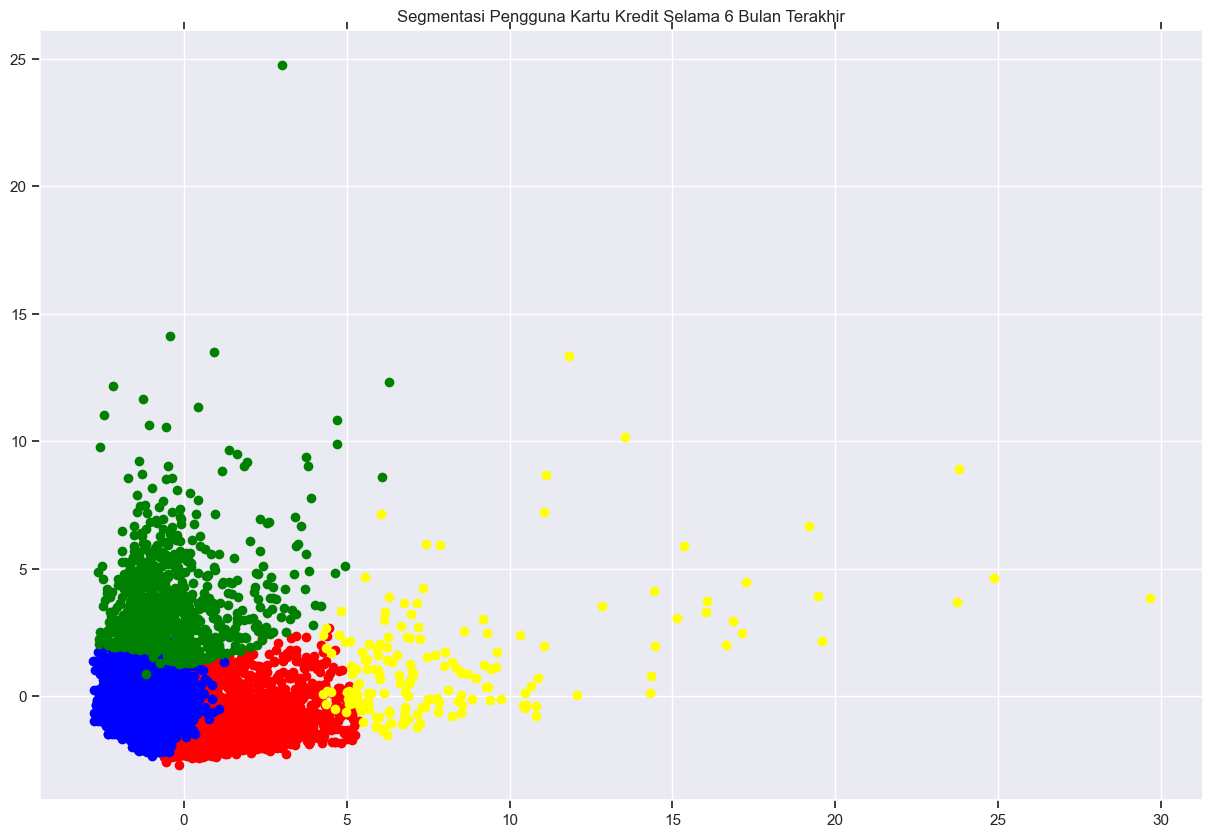

In [34]:
fig, ax = plt.subplots(figsize=(15,10))

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=7, color=colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')

ax.set_title('Segmentasi Pengguna Kartu Kredit Selama 6 Bulan Terakhir')
plt.show()

#### Cluster analysis

In [35]:
df_profile_overall = pd.DataFrame()
df_profile_overall['Overall'] = train.describe().loc[['mean']].T

df_cluster_summary = train.groupby('cluster').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')

df_profile = df_cluster_summary.join(df_profile_overall).reset_index()
df_profile.style.background_gradient(cmap='YlGnBu').hide_index()


C:\Users\andre\AppData\Local\Temp\ipykernel_4128\4187290984.py:8: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df_profile.style.background_gradient(cmap='YlGnBu').hide_index()


Column Name,Metrics,0,1,2,3,Overall
BALANCE,mean,1022.770231,1008.353084,4725.940453,4247.840952,1584.822559
BALANCE_FREQUENCY,mean,0.939765,0.789068,0.969174,0.987914,0.875979
PURCHASES,mean,1421.357974,267.759394,508.587080,10234.989769,1001.554558
ONEOFF_PURCHASES,mean,723.065280,200.994035,330.447659,6974.001676,594.071524
INSTALLMENTS_PURCHASES,mean,698.314134,67.008243,178.240500,3260.988092,407.615583
CASH_ADVANCE,mean,230.841932,601.357415,4666.903348,693.484231,993.731185
PURCHASES_FREQUENCY,mean,0.895268,0.181346,0.282147,0.942678,0.489777
ONEOFF_PURCHASES_FREQUENCY,mean,0.323437,0.086761,0.138054,0.769136,0.202437
PURCHASES_INSTALLMENTS_FREQUENCY,mean,0.721256,0.090542,0.176723,0.787178,0.363268
CASH_ADVANCE_FREQUENCY,mean,0.042966,0.115922,0.493135,0.063584,0.135866


- Cluster 3 tidak memiliki Balance yang paling tinggi di antara cluster yang lainnya, namun memiliki purchase, credit limit dan payments yang paling tinggi dibandingkan cluster lainnya. 
- Cluster 2 memiliki Balance, credit limit dan payment kedua tertinggi. Namun, purchase cluster 2 adalah kedua terendah.
- Cluster 1 memiliki Balance, credit limit, payments terendah dibandingkan cluster lainnya. 
- Cluster 0 memiliki Balance terendah, namun purchase cluster adalah tertinggi kedua. Namun credit limit dan payment cluster 0 lebih rendah dibandingkan cluster 3 dan 2

# H. Kesimpulan

- Data di atas memiliki banyak outlier, namun karena outlier memiliki jumlah yang sangaat banyak, maka outlier tersebut tidak dibuang karena akan mempengaruhi analisa.
- TENURE terpendek dari kartu kredit adalah selama 6 bulan dan terlama pada 12 bulan
- Dari data di atas, didapatkan bahwa korelasi terbesar adalah antara ONEOFF_PURCHASE dan PURCHASE. Korelasi terkuat kedua adalah sebesar 0.863 antara kolom PURCHASES_INSTALLMENT_FREQUENCY dengan PURCHASES_FREQUENCY. Hal ini menandakan bahwa semakin banyak transaksi yang dilakukan, maka semakin banyak juga cicilan yang dilakukan dan juga sebaliknya.
- Dari hasil analisa cluster, dapat disimpulkan bahwa cluster 3 merupakan pengguna kartu kredit paling aktif dengan purchase frequency sebesar 0.94 dan cluster 1 adalah cluster dengan pengguna kartu kredit yang tidak terlalu aktif dengan purchase frequecy sebesar 0.18. Semua cluster memiliki rata-rata tenur sebesar 11.52 bulan. 

# I. Model Deployment and Inference

In [36]:
with open("kmeans.pkl","wb") as f:
    pickle.dump(kmean,f)

In [37]:
inference = pd.DataFrame({'BALANCE': [30, 0, 10000], 
                        'BALANCE_FREQUENCY':[0.7, 0.8 ,1], 
                        'PURCHASES': [2854, 460, 14628], 
                        'ONEOFF_PURCHASES':[715, 531,7100],
                        'INSTALLMENTS_PURCHASES':[2400, 0 ,2500], 
                        'CASH_ADVANCE':[4500, 0, 3000], 
                        'PURCHASES_FREQUENCY': [0.4, 0.1, 0.9],
                        'ONEOFF_PURCHASES_FREQUENCY' : [0, 0.3, 0], 
                        'PURCHASES_INSTALLMENTS_FREQUENCY': [0.5,0, 0.7],
                        'CASH_ADVANCE_FREQUENCY': [0.6,0,0.3], 
                        'CASH_ADVANCE_TRX':[4,0,6], 
                        'PURCHASES_TRX': [46, 10, 23],
                        'CREDIT_LIMIT': [50000, 5000, 15000], 
                        'PAYMENTS': [13668, 1400, 7000], 
                        'MINIMUM_PAYMENTS': [4000, 255, 8000], 
                        'PRC_FULL_PAYMENT': [0,1,0],
                        'TENURE':[12,12,12]})
inference

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,30,0.700000,2854,715,2400,4500,0.400000,0.000000,0.500000,0.600000,4,46,50000,13668,4000,0,12
1,0,0.800000,460,531,0,0,0.100000,0.300000,0.000000,0.000000,0,10,5000,1400,255,1,12
2,10000,1.000000,14628,7100,2500,3000,0.900000,0.000000,0.700000,0.300000,6,23,15000,7000,8000,0,12


In [38]:
loaded_model = pickle.load(open('kmeans.pkl', 'rb'))
y_pred_inf = loaded_model.predict(inference)
inference['prediciton'] = y_pred_inf
inference

C:\Users\andre\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,prediciton
0,30,0.700000,2854,715,2400,4500,0.400000,0.000000,0.500000,0.600000,4,46,50000,13668,4000,0,12,3
1,0,0.800000,460,531,0,0,0.100000,0.300000,0.000000,0.000000,0,10,5000,1400,255,1,12,3
2,10000,1.000000,14628,7100,2500,3000,0.900000,0.000000,0.700000,0.300000,6,23,15000,7000,8000,0,12,3
